In [24]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [25]:
# read data from preprocessed csv file
data = pd.read_csv('preprocessed_data.csv')

#split data into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)



In [26]:
# Drop the label column from the test data
test_features = test.drop(['No-show'], axis=1)


In [27]:
# Create a Naive Bayes classifier for the data with each row being one feature vector
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(train.drop(['No-show'], axis=1), train['No-show'])

# print accuracy of the model on training data
print("Accuracy of the model on training data: ", gnb.score(train.drop(['No-show'], axis=1), train['No-show']))







Accuracy of the model on training data:  0.7984385905953519


In [28]:
# Predict the labels for the test data
pred = gnb.predict(test_features)

# Print the accuracy of the classifier
from sklearn.metrics import accuracy_score
gnb_acc = accuracy_score(test['No-show'], pred)
print(gnb_acc)



0.7972373857707271


Overfitting would be signified by a marginally large difference in accuracy between the training set and the testing set.
What we observe is that the accuracy is the same when rounded to 4 decimal points, and is not overfitted to the training data
(We would observe an accuracy next to perfect for the training set as well for an overfit model)

In [29]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



In [30]:

# Create a SVM classifier for the data with each row being one feature vector
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Train the classifier on the training data
clf.fit(train.drop(['No-show'], axis=1), train['No-show'])



# print accuracy of the model on training data
print("Accuracy of the model on training data: ", clf.score(train.drop(['No-show'], axis=1), train['No-show']))


Accuracy of the model on training data:  0.7984515161698937


In [31]:
# Predict the labels for the test data
pred = clf.predict(test_features)

# Print the accuracy of the classifier
svm_acc = accuracy_score(test['No-show'], pred)
print(svm_acc)



0.7971770666827518


In [32]:
# Create a Decision Tree classifier for the data with each row being one feature vector
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training data
clf.fit(train.drop(['No-show'], axis=1), train['No-show'])

# print accuracy of the model on training data
print("Accuracy of the model on training data: ", clf.score(train.drop(['No-show'], axis=1), train['No-show']))


Accuracy of the model on training data:  0.8019672724452602


In [33]:
# Predict the labels for the test data
pred = clf.predict(test_features)

# Print the accuracy of the classifier
dtc_acc = accuracy_score(test['No-show'], pred)
print(dtc_acc)

#OVERFITTED


0.794492867267847


In [34]:
# Print all of the accuracies of the models on the test data:
print("Naive Bayes Accuracy: ", gnb_acc)
print("SVM Accuracy: ", svm_acc)
print("Decision Tree Accuracy: ", dtc_acc)

# Calculate the Greatest Accuracy
max_acc = max(gnb_acc, svm_acc, dtc_acc)
if max_acc == gnb_acc:
    maxvar = "Naive Bayes"
elif max_acc == svm_acc:
    maxvar = "SVM"
else:
    maxvar = "Decision Tree"

print("The Highest accuracy is: " + maxvar + " with an accuracy of: " + str(max_acc))




Naive Bayes Accuracy:  0.7972373857707271
SVM Accuracy:  0.7971770666827518
Decision Tree Accuracy:  0.794492867267847
The Highest accuracy is: Naive Bayes with an accuracy of: 0.7972373857707271


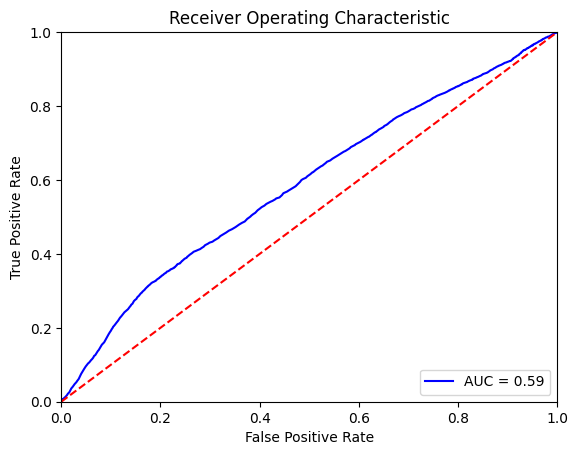

In [51]:
# Plot a simple ROC curve for the Naive Bayes classifier
from sklearn.metrics import roc_curve, auc

#define prediction probabilities
pred = gnb.predict_proba(test_features)[:,1]

fpr, tpr, thresholds = roc_curve(test['No-show'], pred)

roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


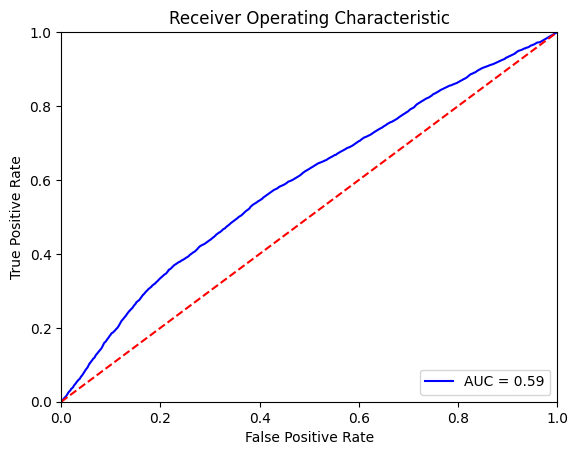

In [52]:
# Plot a simple ROC curve for the SVM classifier
from sklearn.metrics import roc_curve, auc

#define prediction probabilities
pred = clf.predict_proba(test_features)[:,1]

fpr, tpr, thresholds = roc_curve(test['No-show'], pred)

roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


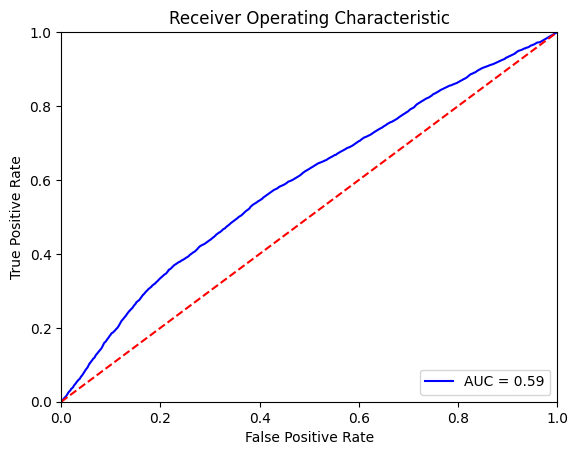

In [53]:
# Plot a simple ROC curve for the Decision Tree classifier\
from sklearn.metrics import roc_curve, auc

#define prediction probabilities
pred = clf.predict_proba(test_features)[:,1]

fpr, tpr, thresholds = roc_curve(test['No-show'], pred)

roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
